In [ ]:
# 📌 Step 1: Install dependencies (if needed)
!pip install opencv-python opencv-contrib-python matplotlib

# 📌 Step 2: Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

def show_img(img, title='Image'):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()


Saving noise.png to noise (1).png


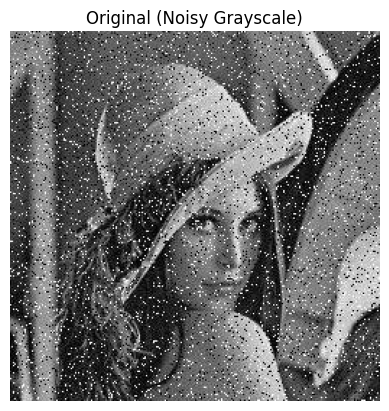

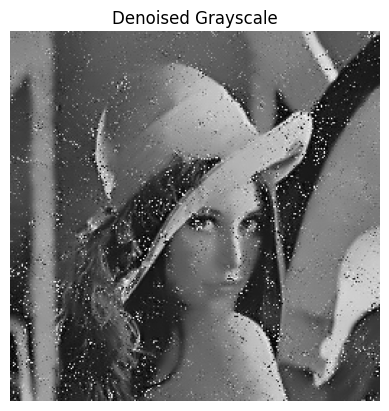

In [ ]:
# Upload grayscale noisy image
from google.colab import files
uploaded = files.upload()

# Read the grayscale image
import cv2
import matplotlib.pyplot as plt

filename = list(uploaded.keys())[0]
gray_img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

# Denoise the grayscale image
denoised = cv2.fastNlMeansDenoising(gray_img, None, h=30, templateWindowSize=7, searchWindowSize=21)

# Show results
def show_gray(img, title='Image'):
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

show_gray(gray_img, 'Original (Noisy Grayscale)')
show_gray(denoised, 'Denoised Grayscale')


Saving img1.png to img1.png
Saving img2.png to img2.png


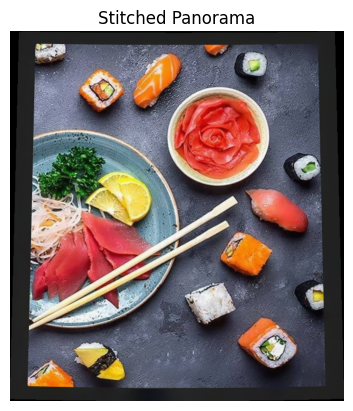

In [ ]:
# 📌 Upload 2+ images for stitching
uploaded = files.upload()
images = [cv2.imread(fname) for fname in uploaded.keys()]

# 📌 Stitch
stitcher = cv2.Stitcher_create()
status, result = stitcher.stitch(images)

# 📌 Show result
if status == cv2.Stitcher_OK:
    show_img(result, 'Stitched Panorama')
else:
    print('❌ Stitching failed')


Saving img1.png to img1 (1).png
Saving img2.png to img2 (1).png


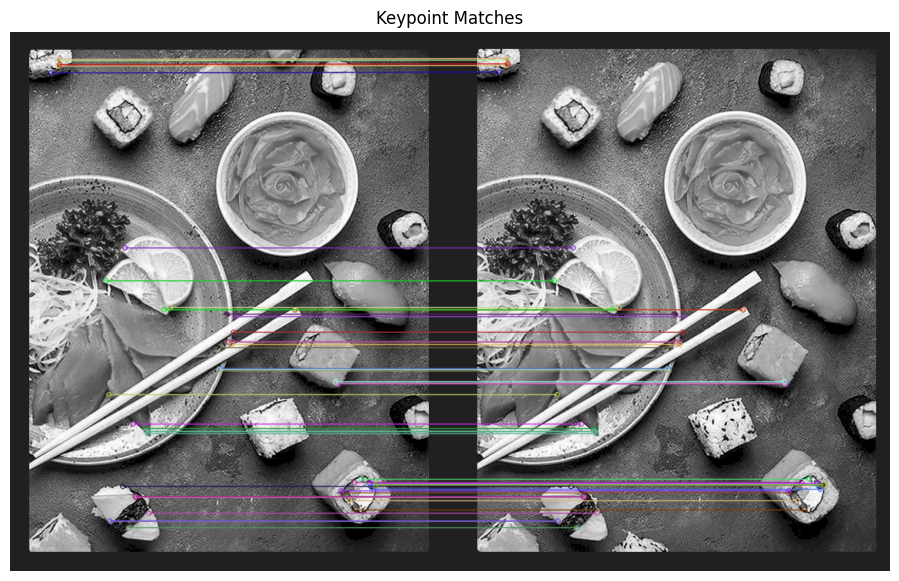

Rotation Matrix:
 [[ 0.19206808  0.90929043  0.36918935]
 [ 0.91029121 -0.02449482 -0.41324316]
 [-0.36671482  0.41544064 -0.83242376]]
Translation Vector:
 [[-0.63591   ]
 [ 0.7145986 ]
 [-0.29149154]]


In [ ]:
# 📌 Upload two overlapping images
uploaded = files.upload()
imgs = list(uploaded.keys())
img1 = cv2.imread(imgs[0], 0)
img2 = cv2.imread(imgs[1], 0)

# 📌 Detect ORB keypoints and match
orb = cv2.ORB_create(500)
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)

img_matches = cv2.drawMatches(img1, kp1, img2, kp2, matches[:50], None, flags=2)
plt.figure(figsize=(15, 7))
plt.imshow(img_matches)
plt.title('Keypoint Matches')
plt.axis('off')
plt.show()

# 📌 Estimate Essential Matrix & Pose
pts1 = np.float32([kp1[m.queryIdx].pt for m in matches])
pts2 = np.float32([kp2[m.trainIdx].pt for m in matches])

E, mask = cv2.findEssentialMat(pts1, pts2, focal=1.0, pp=(0., 0.), method=cv2.RANSAC, prob=0.999, threshold=1.0)
_, R, t, mask_pose = cv2.recoverPose(E, pts1, pts2)

# 📌 Display result
print("Rotation Matrix:\n", R)
print("Translation Vector:\n", t)
